In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, rand_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Rescaling, SimpleRNN, Embedding, Reshape
from keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
import glob
from PIL import Image
%matplotlib inline

rs = 12

2023-06-08 03:55:44.915497: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

def loss_acc_plot(hist):
    val_losses = hist.history['val_loss']
    val_accuracies = hist.history['val_accuracy']
    train_losses = hist.history['loss']
    train_accuracies = hist.history['accuracy']
    epochs = range(1, len(val_losses) + 1)

    sns.lineplot(x=epochs, y=val_losses, color='red')
    sns.lineplot(x=epochs, y=val_accuracies, color='blue')
    sns.lineplot(x=epochs, y=train_losses, color='purple')
    sns.lineplot(x=epochs, y=train_accuracies, color='green').set_ylim(bottom=0, top=2)
    plt.legend(labels=['validation loss', 'validation accuracy', 'training loss', 'training accuracy'])


Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Epoch 1/1000
7/7 [==============================] - 1s 49ms/step - loss: 3.5030 - accuracy: 0.5419 - val_loss: 0.8906 - val_accuracy: 0.7400
Epoch 2/1000
7/7 [==============================] - 0s 27ms/step - loss: 0.6760 - accuracy: 0.7389 - val_loss: 0.6188 - val_accuracy: 0.8600
Epoch 3/1000
7/7 [==============================] - 0s 28ms/step - loss: 0.4983 - accuracy: 0.7438 - val_loss: 0.5796 - val_accuracy: 0.8400
Epoch 4/1000
7/7 [==============================] - 0s 25ms/step - loss: 0.4978 - accuracy: 0.7340 - val_loss: 0.6035 - val_accuracy: 0.8600
Epoch 5/1000
7/7 [==============================] - 0s 26ms/step - loss: 0.4399 - accuracy: 0.8030 - val_loss: 1.0775 - val_accuracy: 0.5000
Epoch 6/1000
7/7 [==============================] - 0s 25ms/step - loss: 0.4433 - accuracy: 0.7635 - val_loss: 0.7031 - val_accuracy: 0.8600
Epoch 7/1000


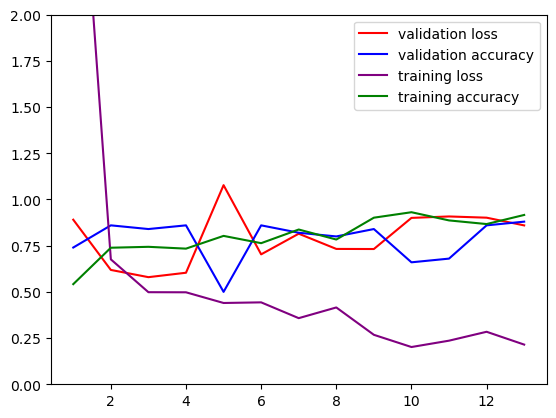

In [178]:

img_size = (128, 128)
epochs = 1000
mris_train = keras.utils.image_dataset_from_directory(
    'brain_tumor_dataset/',
    validation_split=0.2,
    subset='training',
    seed=rs,
    image_size=img_size)
mris_test = keras.utils.image_dataset_from_directory(
    'brain_tumor_dataset/',
    validation_split=0.2,
    subset='validation',
    seed=rs,
    image_size=img_size)


epochs = 1000
model = Sequential([
    Rescaling(1./255),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

es = keras.callbacks.EarlyStopping(restore_best_weights=True, patience=10)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
hist = model.fit(
    mris_train,
    validation_data=mris_test,
    epochs=epochs,
    callbacks=[es]
)

loss_acc_plot(hist)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Epoch 1/1000
7/7 [==============================] - 3s 159ms/step - loss: 0.6713 - accuracy: 0.6404 - val_loss: 0.6977 - val_accuracy: 0.5000
Epoch 2/1000
7/7 [==============================] - 1s 120ms/step - loss: 0.6223 - accuracy: 0.6700 - val_loss: 0.4937 - val_accuracy: 0.7800
Epoch 3/1000
7/7 [==============================] - 1s 123ms/step - loss: 0.5384 - accuracy: 0.7488 - val_loss: 0.4340 - val_accuracy: 0.8600
Epoch 4/1000
7/7 [==============================] - 1s 146ms/step - loss: 0.4756 - accuracy: 0.7783 - val_loss: 0.4747 - val_accuracy: 0.7000
Epoch 5/1000
7/7 [==============================] - 1s 124ms/step - loss: 0.4582 - accuracy: 0.7685 - val_loss: 0.4362 - val_accuracy: 0.7800
Epoch 6/1000
7/7 [==============================] - 1s 120ms/step - loss: 0.4116 - accuracy: 0.7783 - val_loss: 0.3929 - val_accuracy: 0.8800
Epoch 7

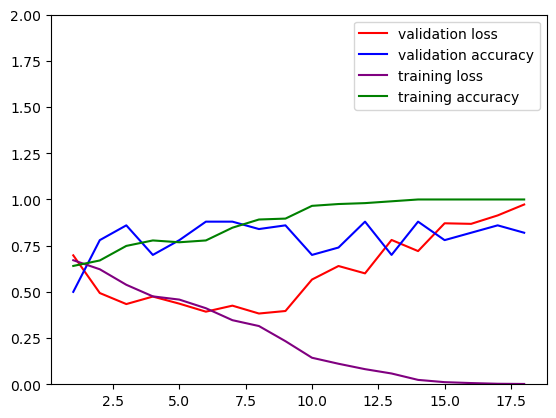

In [179]:

img_size = (128, 128)
epochs = 1000
mris_train = keras.utils.image_dataset_from_directory(
    'brain_tumor_dataset/',
    validation_split=0.2,
    subset='training',
    seed=rs,
    image_size=img_size)
mris_test = keras.utils.image_dataset_from_directory(
    'brain_tumor_dataset/',
    validation_split=0.2,
    subset='validation',
    seed=rs,
    image_size=img_size)

batchsize = 32
input_shape = (32, 128, 128, 3)
kernel_size = (8, 8)
strides = (2,2)
epochs = 1000
model = Sequential([
    Rescaling(1./255),
    Conv2D(32, kernel_size=kernel_size, strides=strides, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, kernel_size=kernel_size, strides=strides, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

es = keras.callbacks.EarlyStopping(restore_best_weights=True, patience=10)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
hist = model.fit(
    mris_train,
    validation_data=mris_test,
    epochs=epochs,
    callbacks=[es]
)

loss_acc_plot(hist)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Epoch 1/1000
7/7 [==============================] - 4s 540ms/step - loss: 0.6668 - accuracy: 0.6059 - val_loss: 0.5017 - val_accuracy: 0.8000
Epoch 2/1000
7/7 [==============================] - 3s 452ms/step - loss: 0.5902 - accuracy: 0.7340 - val_loss: 0.5084 - val_accuracy: 0.8000
Epoch 3/1000
7/7 [==============================] - 4s 543ms/step - loss: 0.5286 - accuracy: 0.7783 - val_loss: 0.4410 - val_accuracy: 0.8600
Epoch 4/1000
7/7 [==============================] - 4s 524ms/step - loss: 0.5133 - accuracy: 0.7438 - val_loss: 0.4509 - val_accuracy: 0.8400
Epoch 5/1000
7/7 [==============================] - 4s 568ms/step - loss: 0.4694 - accuracy: 0.8030 - val_loss: 0.4553 - val_accuracy: 0.8200
Epoch 6/1000
7/7 [==============================] - 4s 494ms/step - loss: 0.4220 - accuracy: 0.8030 - val_loss: 0.4598 - val_accuracy: 0.8600
Epoch 7

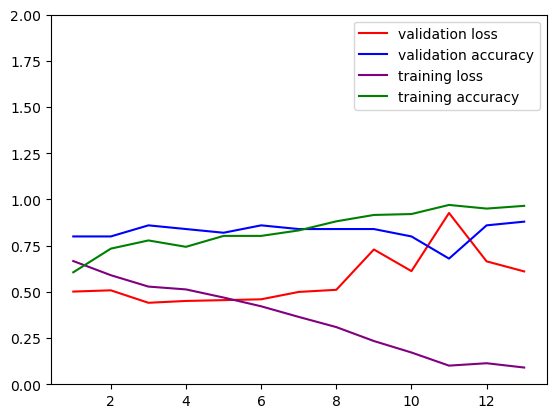

In [180]:
# double image size
img_size = (256, 256)

mris_train = keras.utils.image_dataset_from_directory(
    'brain_tumor_dataset/',
    validation_split=0.2,
    subset='training',
    seed=rs,
    image_size=img_size)
mris_test = keras.utils.image_dataset_from_directory(
    'brain_tumor_dataset/',
    validation_split=0.2,
    subset='validation',
    seed=rs,
    image_size=img_size)

batchsize = 32
input_shape = (32, 256, 256, 3)
kernel_size = (8, 8)
strides = (2,2)
epochs = 1000
model = Sequential([
    Rescaling(1./255),
    Conv2D(32, kernel_size=kernel_size, strides=strides, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, kernel_size=kernel_size, strides=strides, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

es = keras.callbacks.EarlyStopping(restore_best_weights=True, patience=10)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
hist = model.fit(
    mris_train,
    validation_data=mris_test,
    epochs=epochs,
    callbacks=[es]
)

loss_acc_plot(hist)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Epoch 1/1000
7/7 [==============================] - 3s 325ms/step - loss: 0.7015 - accuracy: 0.4926 - val_loss: 0.5871 - val_accuracy: 0.7400
Epoch 2/1000
7/7 [==============================] - 2s 340ms/step - loss: 0.6787 - accuracy: 0.5813 - val_loss: 0.6605 - val_accuracy: 0.8400
Epoch 3/1000
7/7 [==============================] - 2s 270ms/step - loss: 0.6645 - accuracy: 0.6946 - val_loss: 0.5348 - val_accuracy: 0.7400
Epoch 4/1000
7/7 [==============================] - 2s 257ms/step - loss: 0.6201 - accuracy: 0.6404 - val_loss: 0.4709 - val_accuracy: 0.8600
Epoch 5/1000
7/7 [==============================] - 2s 255ms/step - loss: 0.5333 - accuracy: 0.7537 - val_loss: 0.5468 - val_accuracy: 0.7600
Epoch 6/1000
7/7 [==============================] - 2s 325ms/step - loss: 0.5183 - accuracy: 0.7635 - val_loss: 0.4783 - val_accuracy: 0.8600
Epoch 7

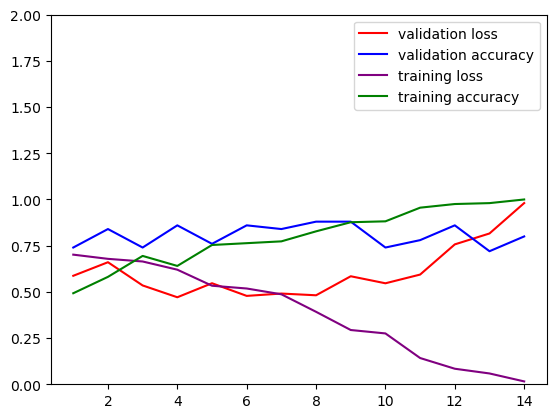

In [181]:
# double stride and kernel
img_size = (256, 256)

mris_train = keras.utils.image_dataset_from_directory(
    'brain_tumor_dataset/',
    validation_split=0.2,
    subset='training',
    seed=rs,
    image_size=img_size)
mris_test = keras.utils.image_dataset_from_directory(
    'brain_tumor_dataset/',
    validation_split=0.2,
    subset='validation',
    seed=rs,
    image_size=img_size)

batchsize = 32
input_shape = (32, 256, 256, 3)
kernel_size = (16, 16)
strides = (4,4)
epochs = 1000
model = Sequential([
    Rescaling(1./255),
    Conv2D(32, kernel_size=kernel_size, strides=strides, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, kernel_size=kernel_size, strides=strides, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

es = keras.callbacks.EarlyStopping(restore_best_weights=True, patience=10)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
hist = model.fit(
    mris_train,
    validation_data=mris_test,
    epochs=epochs,
    callbacks=[es]
)

loss_acc_plot(hist)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Epoch 1/1000
7/7 [==============================] - 2s 127ms/step - loss: 0.6833 - accuracy: 0.5961 - val_loss: 0.6054 - val_accuracy: 0.8600
Epoch 2/1000
7/7 [==============================] - 1s 101ms/step - loss: 0.6286 - accuracy: 0.6502 - val_loss: 0.6094 - val_accuracy: 0.6400
Epoch 3/1000
7/7 [==============================] - 1s 103ms/step - loss: 0.5354 - accuracy: 0.7783 - val_loss: 0.4177 - val_accuracy: 0.8600
Epoch 4/1000
7/7 [==============================] - 1s 102ms/step - loss: 0.4925 - accuracy: 0.7734 - val_loss: 0.4027 - val_accuracy: 0.8600
Epoch 5/1000
7/7 [==============================] - 1s 119ms/step - loss: 0.4579 - accuracy: 0.8030 - val_loss: 0.4751 - val_accuracy: 0.7400
Epoch 6/1000
7/7 [==============================] - 1s 108ms/step - loss: 0.4293 - accuracy: 0.7734 - val_loss: 0.3880 - val_accuracy: 0.8800
Epoch 7

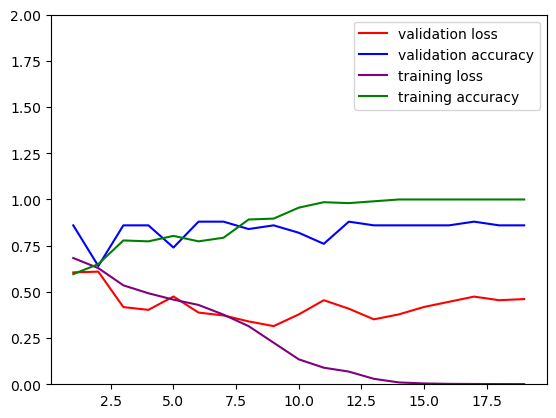

In [182]:
# same as og except padding=valid
img_size = (128, 128)
epochs = 1000
mris_train = keras.utils.image_dataset_from_directory(
    'brain_tumor_dataset/',
    validation_split=0.2,
    subset='training',
    seed=rs,
    image_size=img_size)
mris_test = keras.utils.image_dataset_from_directory(
    'brain_tumor_dataset/',
    validation_split=0.2,
    subset='validation',
    seed=rs,
    image_size=img_size)

batchsize = 32
input_shape = (32, 256, 256, 3)
kernel_size = (8, 8)
strides = (2,2)

model = Sequential([
    Rescaling(1./255),
    Conv2D(32, kernel_size=kernel_size, strides=strides, padding='valid', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, kernel_size=kernel_size, strides=strides, padding='valid', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

es = keras.callbacks.EarlyStopping(restore_best_weights=True, patience=10)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
hist = model.fit(
    mris_train,
    validation_data=mris_test,
    epochs=epochs,
    callbacks=[es]
)

loss_acc_plot(hist)


Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.
Epoch 1/1000
7/7 [==============================] - 1s 129ms/step - loss: 0.9092 - accuracy: 0.7094 - val_loss: 0.6291 - val_accuracy: 0.6600
Epoch 2/1000
7/7 [==============================] - 1s 61ms/step - loss: 0.5966 - accuracy: 0.7488 - val_loss: 0.4831 - val_accuracy: 0.8400
Epoch 3/1000
7/7 [==============================] - 1s 68ms/step - loss: 0.4947 - accuracy: 0.7537 - val_loss: 0.4485 - val_accuracy: 0.8600
Epoch 4/1000
7/7 [==============================] - 1s 65ms/step - loss: 0.4331 - accuracy: 0.8030 - val_loss: 0.4794 - val_accuracy: 0.8200
Epoch 5/1000
7/7 [==============================] - 1s 82ms/step - loss: 0.3701 - accuracy: 0.8473 - val_loss: 0.4689 - val_accuracy: 0.8400
Epoch 6/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.3055 - accuracy: 0.8818 - val_loss: 0.4699 - val_accuracy: 0.8600
Epoch 7/1000

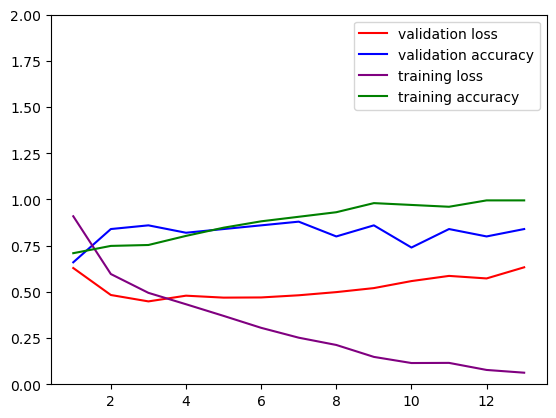

In [183]:
img_size = (128, 128)
epochs = 1000
mris_train = keras.utils.image_dataset_from_directory(
    'brain_tumor_dataset/',
    validation_split=0.2,
    subset='training',
    seed=rs,
    image_size=img_size)
mris_test = keras.utils.image_dataset_from_directory(
    'brain_tumor_dataset/',
    validation_split=0.2,
    subset='validation',
    seed=rs,
    image_size=img_size)

batchsize = 32
input_shape = (32, 256, 256, 3)
kernel_size = (8, 8)
strides = (2,2)

model = Sequential([
    Rescaling(1./255),
    Conv2D(16, kernel_size=kernel_size, strides=strides, padding='valid', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

es = keras.callbacks.EarlyStopping(restore_best_weights=True, patience=10)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
hist = model.fit(
    mris_train,
    validation_data=mris_test,
    epochs=epochs,
    callbacks=[es]
)

loss_acc_plot(hist)